In [2]:
# -*- coding : utf-8 -*-

from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import datasets
import numpy as np

Using TensorFlow backend.


In [6]:
class mnist_ANN(models.Model):
    
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x, y)
        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                     metrics = ['accuracy'])

In [7]:
        
def data_load():
    (in_train, out_train), (in_test, out_test) = datasets.mnist.load_data()
    
    out_train = np_utils.to_categorical(out_train)
    out_test = np_utils.to_categorical(out_test)
    
    L, W, H = in_train.shape
    in_train = in_train.reshape(-1, W*H)
    in_test = in_test.reshape(-1, W*H)
    
    in_train = in_train / 255.0
    in_test = in_test / 255.0
    
    in_vali = in_train[50000:]
    out_vali = out_train[50000:]
    
    in_train = in_train[:50000]
    out_train = out_train[:50000]
    
    return (in_train, out_train), (in_test, out_test), (in_vali, out_vali)

In [8]:
def ANN_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('ANN Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def ANN_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('ANN Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)

In [10]:
def main():
    Nin = 784
    Nh = 100
    Nout = 10
    
    model = mnist_ANN(Nin, Nh, Nout)
    (in_train, out_train), (in_test, out_test), valid = data_load()
    
    history = model.fit(in_train, out_train, epochs = 15, validation_data= valid,
                        batch_size = 100)
    perform_test = model.evaluate(in_test, out_test, batch_size=100)
    print('Test Loss and Accuracy : ', perform_test)
    
    ANN_loss(history)
    plt.show()
    ANN_acc(history)
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/15


  100/50000 [..............................] - ETA: 2:09 - loss: 2.2763 - acc: 0.1300

  900/50000 [..............................] - ETA: 17s - loss: 1.9123 - acc: 0.4444 

 1900/50000 [>.............................] - ETA: 9s - loss: 1.5931 - acc: 0.5800 

 3100/50000 [>.............................] - ETA: 6s - loss: 1.3242 - acc: 0.6571

 4300/50000 [=>............................] - ETA: 5s - loss: 1.1428 - acc: 0.7019

 5500/50000 [==>...........................] - ETA: 4s - loss: 1.0195 - acc: 0.7335

 6700/50000 [===>..........................] - ETA: 3s - loss: 0.9266 - acc: 0.7590

 7800/50000 [===>..........................] - ETA: 3s - loss: 0.8595 - acc: 0.7755

 9000/50000 [====>.........................] - ETA: 3s - loss: 0.8028 - acc: 0.7891

10000/50000 [=====>........................] - ETA: 2s - loss: 0.7610 - acc: 0.7997

11200/50000 [=====>........................] - ETA: 2s - loss: 0.7225 - acc: 0.8096

12300/50000 [======>.......................] - ETA: 2s - loss: 0.6886 - acc: 0.8175

13300/50000 [======>.......................] - ETA: 2s - loss: 0.6661 - acc: 0.8229



14400/50000 [=======>......................] - ETA: 2s - loss: 0.6433 - acc: 0.8281

15000/50000 [========>.....................] - ETA: 2s - loss: 0.6317 - acc: 0.8307

16000/50000 [========>.....................] - ETA: 2s - loss: 0.6100 - acc: 0.8362

17200/50000 [=========>....................] - ETA: 2s - loss: 0.5896 - acc: 0.8409

18400/50000 [==========>...................] - ETA: 1s - loss: 0.5717 - acc: 0.8453

19600/50000 [==========>...................] - ETA: 1s - loss: 0.5562 - acc: 0.8493

20900/50000 [===========>..................] - ETA: 1s - loss: 0.5431 - acc: 0.8525

22100/50000 [============>.................] - ETA: 1s - loss: 0.5308 - acc: 0.8559

23200/50000 [============>.................] - ETA: 1s - loss: 0.5200 - acc: 0.8588

24100/50000 [=============>................] - ETA: 1s - loss: 0.5118 - acc: 0.8609

25300/50000 [==============>...............] - ETA: 1s - loss: 0.5018 - acc: 0.8634

26400/50000 [==============>...............] - ETA: 1s - loss: 0.4942 - acc: 0.8652

27500/50000 [===============>..............] - ETA: 1s - loss: 0.4849 - acc: 0.8675

28700/50000 [================>.............] - ETA: 1s - loss: 0.4762 - acc: 0.8701

29800/50000 [================>.............] - ETA: 1s - loss: 0.4684 - acc: 0.8718

30900/50000 [=================>............] - ETA: 1s - loss: 0.4618 - acc: 0.8733

32100/50000 [==================>...........] - ETA: 1s - loss: 0.4540 - acc: 0.8753

33200/50000 [==================>...........] - ETA: 0s - loss: 0.4479 - acc: 0.8771

34200/50000 [===================>..........] - ETA: 0s - loss: 0.4442 - acc: 0.8782

35400/50000 [====================>.........] - ETA: 0s - loss: 0.4387 - acc: 0.8800

36600/50000 [====================>.........] - ETA: 0s - loss: 0.4324 - acc: 0.8817

37900/50000 [=====================>........] - ETA: 0s - loss: 0.4269 - acc: 0.8830

39100/50000 [======================>.......] - ETA: 0s - loss: 0.4216 - acc: 0.8842

40400/50000 [=======================>......] - ETA: 0s - loss: 0.4166 - acc: 0.8851

41600/50000 [=======================>......] - ETA: 0s - loss: 0.4119 - acc: 0.8863

42900/50000 [========================>.....] - ETA: 0s - loss: 0.4060 - acc: 0.8879

44100/50000 [=========================>....] - ETA: 0s - loss: 0.4020 - acc: 0.8889

45500/50000 [==========================>...] - ETA: 0s - loss: 0.3964 - acc: 0.8906

46700/50000 [===========================>..] - ETA: 0s - loss: 0.3928 - acc: 0.8915

47700/50000 [===========================>..] - ETA: 0s - loss: 0.3899 - acc: 0.8923

48900/50000 [============================>.] - ETA: 0s - loss: 0.3869 - acc: 0.8931

50000/50000 [==============================] - 3s 55us/step - loss: 0.3832 - acc: 0.8939 - val_loss: 0.2074 - val_acc: 0.9423


Epoch 2/15
  100/50000 [..............................] - ETA: 3s - loss: 0.2440 - acc: 0.9200

  700/50000 [..............................] - ETA: 4s - loss: 0.1888 - acc: 0.9443

 1900/50000 [>.............................] - ETA: 2s - loss: 0.2010 - acc: 0.9405

 3200/50000 [>.............................] - ETA: 2s - loss: 0.2016 - acc: 0.9416

 4300/50000 [=>............................] - ETA: 2s - loss: 0.1978 - acc: 0.9449

 5500/50000 [==>...........................] - ETA: 2s - loss: 0.1994 - acc: 0.9449

 6800/50000 [===>..........................] - ETA: 2s - loss: 0.1988 - acc: 0.9444

 8100/50000 [===>..........................] - ETA: 1s - loss: 0.2018 - acc: 0.9443

 9400/50000 [====>.........................] - ETA: 1s - loss: 0.2037 - acc: 0.9433

10800/50000 [=====>........................] - ETA: 1s - loss: 0.2051 - acc: 0.9429

12200/50000 [======>.......................] - ETA: 1s - loss: 0.2032 - acc: 0.9436

13500/50000 [=======>......................] - ETA: 1s - loss: 0.2023 - acc: 0.9439

14600/50000 [=======>......................] - ETA: 1s - loss: 0.2015 - acc: 0.9443

15700/50000 [========>.....................] - ETA: 1s - loss: 0.2002 - acc: 0.9445

17000/50000 [=========>....................] - ETA: 1s - loss: 0.1989 - acc: 0.9448

18300/50000 [=========>....................] - ETA: 1s - loss: 0.2004 - acc: 0.9447

19600/50000 [==========>...................] - ETA: 1s - loss: 0.1984 - acc: 0.9448

20800/50000 [===========>..................] - ETA: 1s - loss: 0.1960 - acc: 0.9455

21900/50000 [============>.................] - ETA: 1s - loss: 0.1945 - acc: 0.9460

23300/50000 [============>.................] - ETA: 1s - loss: 0.1948 - acc: 0.9460

24600/50000 [=============>................] - ETA: 1s - loss: 0.1942 - acc: 0.9460

25900/50000 [==============>...............] - ETA: 1s - loss: 0.1919 - acc: 0.9466

27200/50000 [===============>..............] - ETA: 0s - loss: 0.1909 - acc: 0.9469

28500/50000 [================>.............] - ETA: 0s - loss: 0.1904 - acc: 0.9471

29800/50000 [================>.............] - ETA: 0s - loss: 0.1904 - acc: 0.9469

31100/50000 [=================>............] - ETA: 0s - loss: 0.1888 - acc: 0.9473

32400/50000 [==================>...........] - ETA: 0s - loss: 0.1882 - acc: 0.9471

33700/50000 [===================>..........] - ETA: 0s - loss: 0.1876 - acc: 0.9473

35000/50000 [====================>.........] - ETA: 0s - loss: 0.1876 - acc: 0.9472

36300/50000 [====================>.........] - ETA: 0s - loss: 0.1873 - acc: 0.9472

37600/50000 [=====================>........] - ETA: 0s - loss: 0.1879 - acc: 0.9470

38900/50000 [======================>.......] - ETA: 0s - loss: 0.1861 - acc: 0.9475

40300/50000 [=======================>......] - ETA: 0s - loss: 0.1854 - acc: 0.9476

41600/50000 [=======================>......] - ETA: 0s - loss: 0.1856 - acc: 0.9475

42900/50000 [========================>.....] - ETA: 0s - loss: 0.1857 - acc: 0.9474

44200/50000 [=========================>....] - ETA: 0s - loss: 0.1855 - acc: 0.9476

45600/50000 [==========================>...] - ETA: 0s - loss: 0.1854 - acc: 0.9475

46800/50000 [===========================>..] - ETA: 0s - loss: 0.1850 - acc: 0.9479

48100/50000 [===========================>..] - ETA: 0s - loss: 0.1848 - acc: 0.9478

49500/50000 [============================>.] - ETA: 0s - loss: 0.1842 - acc: 0.9481

50000/50000 [==============================] - 2s 45us/step - loss: 0.1839 - acc: 0.9483 - val_loss: 0.1546 - val_acc: 0.9580


Epoch 3/15
  100/50000 [..............................]

 - ETA: 3s - loss: 0.1553 - acc: 0.9400

  700/50000 [..............................] - ETA: 4s - loss: 0.1222 - acc: 0.9629

 1700/50000 [>.............................] - ETA: 3s - loss: 0.1287 - acc: 0.9629

 3000/50000 [>.............................] - ETA: 2s - loss: 0.1341 - acc: 0.9613

 4300/50000 [=>............................] - ETA: 2s - loss: 0.1408 - acc: 0.9607

 5700/50000 [==>...........................] - ETA: 2s - loss: 0.1427 - acc: 0.9600

 6900/50000 [===>..........................] - ETA: 2s - loss: 0.1403 - acc: 0.9606

 8300/50000 [===>..........................] - ETA: 1s - loss: 0.1417 - acc: 0.9605

 9600/50000 [====>.........................] - ETA: 1s - loss: 0.1426 - acc: 0.9602

10900/50000 [=====>........................] - ETA: 1s - loss: 0.1432 - acc: 0.9596

12000/50000 [======>.......................] - ETA: 1s - loss: 0.1434 - acc: 0.9593

13000/50000 [======>.......................] - ETA: 1s - loss: 0.1444 - acc: 0.9589

14100/50000 [=======>......................] - ETA: 1s - loss: 0.1437 - acc: 0.9591

15400/50000 [========>.....................] - ETA: 1s - loss: 0.1429 - acc: 0.9594

16500/50000 [========>.....................] - ETA: 1s - loss: 0.1415 - acc: 0.9595

17700/50000 [=========>....................] - ETA: 1s - loss: 0.1410 - acc: 0.9598

18900/50000 [==========>...................] - ETA: 1s - loss: 0.1406 - acc: 0.9602

20200/50000 [===========>..................] - ETA: 1s - loss: 0.1414 - acc: 0.9598

21500/50000 [===========>..................] - ETA: 1s - loss: 0.1411 - acc: 0.9591

22800/50000 [============>.................] - ETA: 1s - loss: 0.1402 - acc: 0.9593



24100/50000 [=============>................] - ETA: 1s - loss: 0.1403 - acc: 0.9593

24800/50000 [=============>................] - ETA: 1s - loss: 0.1408 - acc: 0.9590

26000/50000 [==============>...............] - ETA: 1s - loss: 0.1413 - acc: 0.9590

27400/50000 [===============>..............] - ETA: 0s - loss: 0.1395 - acc: 0.9595

28800/50000 [================>.............] - ETA: 0s - loss: 0.1391 - acc: 0.9595

30000/50000 [=================>............] - ETA: 0s - loss: 0.1388 - acc: 0.9597

31200/50000 [=================>............] - ETA: 0s - loss: 0.1384 - acc: 0.9597

32500/50000 [==================>...........] - ETA: 0s - loss: 0.1374 - acc: 0.9600

33800/50000 [===================>..........] - ETA: 0s - loss: 0.1366 - acc: 0.9604



35100/50000 [====================>.........] - ETA: 0s - loss: 0.1368 - acc: 0.9602

36000/50000 [====================>.........] - ETA: 0s - loss: 0.1368 - acc: 0.9602

37200/50000 [=====================>........] - ETA: 0s - loss: 0.1366 - acc: 0.9603

38500/50000 [======================>.......] - ETA: 0s - loss: 0.1362 - acc: 0.9604

39800/50000 [======================>.......] - ETA: 0s - loss: 0.1360 - acc: 0.9605

41100/50000 [=======================>......] - ETA: 0s - loss: 0.1356 - acc: 0.9608

42500/50000 [========================>.....] - ETA: 0s - loss: 0.1350 - acc: 0.9610

43800/50000 [=========================>....] - ETA: 0s - loss: 0.1343 - acc: 0.9611

45100/50000 [==========================>...] - ETA: 0s - loss: 0.1345 - acc: 0.9612

46400/50000 [==========================>...] - ETA: 0s - loss: 0.1343 - acc: 0.9611

47700/50000 [===========================>..] - ETA: 0s - loss: 0.1339 - acc: 0.9613

49000/50000 [============================>.] - ETA: 0s - loss: 0.1335 - acc: 0.9615

50000/50000 [==============================] - 2s 46us/step - loss: 0.1333 - acc: 0.9614 - val_loss: 0.1214 - val_acc: 0.9662


Epoch 4/15
  100/50000 [..............................] - ETA: 2s - loss: 0.0560 - acc: 1.0000

  800/50000 [..............................] - ETA: 3s - loss: 0.0930 - acc: 0.9700

 2000/50000 [>.............................] - ETA: 2s - loss: 0.1083 - acc: 0.9695

 3200/50000 [>.............................] - ETA: 2s - loss: 0.1034 - acc: 0.9706

 4600/50000 [=>............................] - ETA: 2s - loss: 0.0990 - acc: 0.9711

 5700/50000 [==>...........................] - ETA: 2s - loss: 0.1008 - acc: 0.9707

 7000/50000 [===>..........................] - ETA: 1s - loss: 0.1010 - acc: 0.9700

 8300/50000 [===>..........................] - ETA: 1s - loss: 0.1018 - acc: 0.9698

 8900/50000 [====>.........................] - ETA: 1s - loss: 0.1019 - acc: 0.9694

10000/50000 [=====>........................] - ETA: 1s - loss: 0.1015 - acc: 0.9704

11200/50000 [=====>........................] - ETA: 1s - loss: 0.1001 - acc: 0.9710

12600/50000 [======>.......................] - ETA: 1s - loss: 0.1001 - acc: 0.9711

13900/50000 [=======>......................] - ETA: 1s - loss: 0.1007 - acc: 0.9709

15300/50000 [========>.....................] - ETA: 1s - loss: 0.0998 - acc: 0.9710

16600/50000 [========>.....................] - ETA: 1s - loss: 0.1001 - acc: 0.9708

18000/50000 [=========>....................] - ETA: 1s - loss: 0.1012 - acc: 0.9704

19200/50000 [==========>...................] - ETA: 1s - loss: 0.1005 - acc: 0.9706

20600/50000 [===========>..................] - ETA: 1s - loss: 0.1001 - acc: 0.9705

21900/50000 [============>.................] - ETA: 1s - loss: 0.0998 - acc: 0.9708

23200/50000 [============>.................] - ETA: 1s - loss: 0.0998 - acc: 0.9712

24500/50000 [=============>................] - ETA: 1s - loss: 0.1005 - acc: 0.9708

25900/50000 [==============>...............] - ETA: 1s - loss: 0.1020 - acc: 0.9702

27200/50000 [===============>..............] - ETA: 0s - loss: 0.1024 - acc: 0.9701

28600/50000 [================>.............] - ETA: 0s - loss: 0.1029 - acc: 0.9701

29900/50000 [================>.............] - ETA: 0s - loss: 0.1032 - acc: 0.9700

31200/50000 [=================>............] - ETA: 0s - loss: 0.1047 - acc: 0.9697

32300/50000 [==================>...........] - ETA: 0s - loss: 0.1044 - acc: 0.9698

33200/50000 [==================>...........] - ETA: 0s - loss: 0.1054 - acc: 0.9697

34500/50000 [===================>..........] - ETA: 0s - loss: 0.1056 - acc: 0.9695

35800/50000 [====================>.........] - ETA: 0s - loss: 0.1065 - acc: 0.9692

37100/50000 [=====================>........] - ETA: 0s - loss: 0.1057 - acc: 0.9695

38400/50000 [======================>.......] - ETA: 0s - loss: 0.1053 - acc: 0.9696

39700/50000 [======================>.......] - ETA: 0s - loss: 0.1052 - acc: 0.9697

40900/50000 [=======================>......] - ETA: 0s - loss: 0.1050 - acc: 0.9698

42200/50000 [========================>.....] - ETA: 0s - loss: 0.1049 - acc: 0.9699



43400/50000 [=========================>....] - ETA: 0s - loss: 0.1049 - acc: 0.9699

44100/50000 [=========================>....] - ETA: 0s - loss: 0.1046 - acc: 0.9699

45200/50000 [==========================>...] - ETA: 0s - loss: 0.1047 - acc: 0.9699

46500/50000 [==========================>...] - ETA: 0s - loss: 0.1043 - acc: 0.9701

47900/50000 [===========================>..] - ETA: 0s - loss: 0.1044 - acc: 0.9699

49100/50000 [============================>.] - ETA: 0s - loss: 0.1038 - acc: 0.9701

50000/50000 [==============================] - 2s 46us/step - loss: 0.1037 - acc: 0.9701 - val_loss: 0.1079 - val_acc: 0.9676


Epoch 5/15
  100/50000 [..............................] - ETA: 3s - loss: 0.0907 - acc: 0.9700

  800/50000 [..............................] - ETA: 3s - loss: 0.0929 - acc: 0.9750

 2000/50000 [>.............................] - ETA: 2s - loss: 0.0872 - acc: 0.9780

 3300/50000 [>.............................] - ETA: 2s - loss: 0.0847 - acc: 0.9785

 4600/50000 [=>............................] - ETA: 2s - loss: 0.0899 - acc: 0.9759

 5800/50000 [==>...........................] - ETA: 2s - loss: 0.0926 - acc: 0.9757

 7100/50000 [===>..........................] - ETA: 1s - loss: 0.0949 - acc: 0.9745

 8500/50000 [====>.........................] - ETA: 1s - loss: 0.0958 - acc: 0.9742

 9800/50000 [====>.........................] - ETA: 1s - loss: 0.0918 - acc: 0.9757

11100/50000 [=====>........................] - ETA: 1s - loss: 0.0888 - acc: 0.9768

12400/50000 [======>.......................] - ETA: 1s - loss: 0.0877 - acc: 0.9775

13700/50000 [=======>......................] - ETA: 1s - loss: 0.0879 - acc: 0.9772

15100/50000 [========>.....................] - ETA: 1s - loss: 0.0862 - acc: 0.9776

16400/50000 [========>.....................] - ETA: 1s - loss: 0.0863 - acc: 0.9773

17700/50000 [=========>....................] - ETA: 1s - loss: 0.0862 - acc: 0.9771

19000/50000 [==========>...................] - ETA: 1s - loss: 0.0851 - acc: 0.9772

20400/50000 [===========>..................] - ETA: 1s - loss: 0.0852 - acc: 0.9770

21700/50000 [============>.................] - ETA: 1s - loss: 0.0851 - acc: 0.9768

23000/50000 [============>.................] - ETA: 1s - loss: 0.0842 - acc: 0.9773

24300/50000 [=============>................] - ETA: 1s - loss: 0.0839 - acc: 0.9771

25700/50000 [==============>...............] - ETA: 0s - loss: 0.0838 - acc: 0.9771

26900/50000 [===============>..............] - ETA: 0s - loss: 0.0832 - acc: 0.9770

28200/50000 [===============>..............] - ETA: 0s - loss: 0.0833 - acc: 0.9769

29500/50000 [================>.............] - ETA: 0s - loss: 0.0838 - acc: 0.9765

30800/50000 [=================>............] - ETA: 0s - loss: 0.0833 - acc: 0.9767

32000/50000 [==================>...........] - ETA: 0s - loss: 0.0834 - acc: 0.9765

33300/50000 [==================>...........] - ETA: 0s - loss: 0.0835 - acc: 0.9764

34600/50000 [===================>..........] - ETA: 0s - loss: 0.0831 - acc: 0.9765

35900/50000 [====================>.........] - ETA: 0s - loss: 0.0830 - acc: 0.9765

37200/50000 [=====================>........] - ETA: 0s - loss: 0.0824 - acc: 0.9767

38500/50000 [======================>.......] - ETA: 0s - loss: 0.0828 - acc: 0.9765

39700/50000 [======================>.......] - ETA: 0s - loss: 0.0827 - acc: 0.9764

41000/50000 [=======================>......] - ETA: 0s - loss: 0.0829 - acc: 0.9764

42300/50000 [========================>.....] - ETA: 0s - loss: 0.0831 - acc: 0.9763

43700/50000 [=========================>....] - ETA: 0s - loss: 0.0829 - acc: 0.9763

45000/50000 [==========================>...] - ETA: 0s - loss: 0.0836 - acc: 0.9762

46300/50000 [==========================>...] - ETA: 0s - loss: 0.0834 - acc: 0.9762

47600/50000 [===========================>..] - ETA: 0s - loss: 0.0834 - acc: 0.9762

48800/50000 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9762

50000/50000 [==============================] - 2s 44us/step - loss: 0.0832 - acc: 0.9763 - val_loss: 0.0945 - val_acc: 0.9724


Epoch 6/15
  100/50000 [..............................] - ETA: 5s - loss: 0.0416 - acc: 0.9900

  700/50000 [..............................] - ETA: 4s - loss: 0.0617 - acc: 0.9786

 1600/50000 [..............................] - ETA: 3s - loss: 0.0647 - acc: 0.9800

 2800/50000 [>.............................] - ETA: 2s - loss: 0.0592 - acc: 0.9818

 4000/50000 [=>............................] - ETA: 2s - loss: 0.0615 - acc: 0.9818

 5300/50000 [==>...........................] - ETA: 2s - loss: 0.0628 - acc: 0.9819

 6500/50000 [==>...........................] - ETA: 2s - loss: 0.0672 - acc: 0.9803

 7800/50000 [===>..........................] - ETA: 2s - loss: 0.0700 - acc: 0.9800

 9100/50000 [====>.........................] - ETA: 1s - loss: 0.0699 - acc: 0.9799

10500/50000 [=====>........................] - ETA: 1s - loss: 0.0698 - acc: 0.9799

11800/50000 [======>.......................] - ETA: 1s - loss: 0.0708 - acc: 0.9793

13000/50000 [======>.......................] - ETA: 1s - loss: 0.0711 - acc: 0.9794

14300/50000 [=======>......................] - ETA: 1s - loss: 0.0713 - acc: 0.9797

15600/50000 [========>.....................] - ETA: 1s - loss: 0.0725 - acc: 0.9793

16900/50000 [=========>....................] - ETA: 1s - loss: 0.0722 - acc: 0.9795

18100/50000 [=========>....................] - ETA: 1s - loss: 0.0722 - acc: 0.9793

19400/50000 [==========>...................] - ETA: 1s - loss: 0.0720 - acc: 0.9792

20700/50000 [===========>..................] - ETA: 1s - loss: 0.0717 - acc: 0.9794

22000/50000 [============>.................] - ETA: 1s - loss: 0.0712 - acc: 0.9797

23300/50000 [============>.................] - ETA: 1s - loss: 0.0719 - acc: 0.9794

24600/50000 [=============>................] - ETA: 1s - loss: 0.0720 - acc: 0.9794

26000/50000 [==============>...............] - ETA: 1s - loss: 0.0718 - acc: 0.9796

27300/50000 [===============>..............] - ETA: 0s - loss: 0.0711 - acc: 0.9799

28600/50000 [================>.............] - ETA: 0s - loss: 0.0710 - acc: 0.9798

29900/50000 [================>.............] - ETA: 0s - loss: 0.0709 - acc: 0.9796

31200/50000 [=================>............] - ETA: 0s - loss: 0.0710 - acc: 0.9796

32500/50000 [==================>...........] - ETA: 0s - loss: 0.0714 - acc: 0.9796

33800/50000 [===================>..........] - ETA: 0s - loss: 0.0710 - acc: 0.9796

35100/50000 [====================>.........] - ETA: 0s - loss: 0.0707 - acc: 0.9797

36400/50000 [====================>.........] - ETA: 0s - loss: 0.0706 - acc: 0.9797

37700/50000 [=====================>........] - ETA: 0s - loss: 0.0713 - acc: 0.9796

38900/50000 [======================>.......] - ETA: 0s - loss: 0.0709 - acc: 0.9798

40200/50000 [=======================>......] - ETA: 0s - loss: 0.0706 - acc: 0.9799

41400/50000 [=======================>......] - ETA: 0s - loss: 0.0701 - acc: 0.9801



42700/50000 [========================>.....] - ETA: 0s - loss: 0.0701 - acc: 0.9801

43400/50000 [=========================>....] - ETA: 0s - loss: 0.0702 - acc: 0.9801

44500/50000 [=========================>....] - ETA: 0s - loss: 0.0703 - acc: 0.9800

45800/50000 [==========================>...] - ETA: 0s - loss: 0.0701 - acc: 0.9800

47000/50000 [===========================>..] - ETA: 0s - loss: 0.0697 - acc: 0.9801

48300/50000 [===========================>..] - ETA: 0s - loss: 0.0697 - acc: 0.9800

49600/50000 [============================>.] - ETA: 0s - loss: 0.0692 - acc: 0.9802

50000/50000 [==============================] - 2s 46us/step - loss: 0.0691 - acc: 0.9803 - val_loss: 0.0900 - val_acc: 0.9738


Epoch 7/15
  100/50000 [..............................] - ETA: 3s - loss: 0.0740 - acc: 0.9800

  900/50000 [..............................] - ETA: 3s - loss: 0.0431 - acc: 0.9889

 2100/50000 [>.............................] - ETA: 2s - loss: 0.0640 - acc: 0.9829

 3400/50000 [=>............................] - ETA: 2s - loss: 0.0593 - acc: 0.9844

 4600/50000 [=>............................] - ETA: 2s - loss: 0.0564 - acc: 0.9846

 5900/50000 [==>...........................] - ETA: 2s - loss: 0.0549 - acc: 0.9849

 7200/50000 [===>..........................] - ETA: 1s - loss: 0.0570 - acc: 0.9847

 8400/50000 [====>.........................] - ETA: 1s - loss: 0.0569 - acc: 0.9843

 9700/50000 [====>.........................] - ETA: 1s - loss: 0.0572 - acc: 0.9838

11000/50000 [=====>........................] - ETA: 1s - loss: 0.0584 - acc: 0.9835

12300/50000 [======>.......................] - ETA: 1s - loss: 0.0594 - acc: 0.9831

13500/50000 [=======>......................] - ETA: 1s - loss: 0.0600 - acc: 0.9831

14800/50000 [=======>......................] - ETA: 1s - loss: 0.0600 - acc: 0.9833

16100/50000 [========>.....................] - ETA: 1s - loss: 0.0594 - acc: 0.9836

17100/50000 [=========>....................] - ETA: 1s - loss: 0.0592 - acc: 0.9837

18100/50000 [=========>....................] - ETA: 1s - loss: 0.0593 - acc: 0.9836

19400/50000 [==========>...................] - ETA: 1s - loss: 0.0595 - acc: 0.9834

20700/50000 [===========>..................] - ETA: 1s - loss: 0.0596 - acc: 0.9834

22100/50000 [============>.................] - ETA: 1s - loss: 0.0599 - acc: 0.9832

23500/50000 [=============>................] - ETA: 1s - loss: 0.0593 - acc: 0.9835

24800/50000 [=============>................] - ETA: 1s - loss: 0.0593 - acc: 0.9834

26100/50000 [==============>...............] - ETA: 1s - loss: 0.0593 - acc: 0.9834

27400/50000 [===============>..............] - ETA: 0s - loss: 0.0590 - acc: 0.9834

28500/50000 [================>.............] - ETA: 0s - loss: 0.0586 - acc: 0.9836

29700/50000 [================>.............] - ETA: 0s - loss: 0.0582 - acc: 0.9838

30900/50000 [=================>............] - ETA: 0s - loss: 0.0584 - acc: 0.9837

32200/50000 [==================>...........] - ETA: 0s - loss: 0.0584 - acc: 0.9837



33500/50000 [===================>..........] - ETA: 0s - loss: 0.0583 - acc: 0.9838

34200/50000 [===================>..........] - ETA: 0s - loss: 0.0580 - acc: 0.9837

35400/50000 [====================>.........] - ETA: 0s - loss: 0.0580 - acc: 0.9836

36400/50000 [====================>.........] - ETA: 0s - loss: 0.0578 - acc: 0.9837

37600/50000 [=====================>........] - ETA: 0s - loss: 0.0578 - acc: 0.9836

38900/50000 [======================>.......] - ETA: 0s - loss: 0.0574 - acc: 0.9838

40100/50000 [=======================>......] - ETA: 0s - loss: 0.0572 - acc: 0.9839

41400/50000 [=======================>......] - ETA: 0s - loss: 0.0575 - acc: 0.9838

42600/50000 [========================>.....] - ETA: 0s - loss: 0.0574 - acc: 0.9837

43900/50000 [=========================>....] - ETA: 0s - loss: 0.0580 - acc: 0.9836



45000/50000 [==========================>...] - ETA: 0s - loss: 0.0577 - acc: 0.9837

45800/50000 [==========================>...] - ETA: 0s - loss: 0.0578 - acc: 0.9836

46900/50000 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9835

48200/50000 [===========================>..] - ETA: 0s - loss: 0.0581 - acc: 0.9835

49500/50000 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9834

50000/50000 [==============================] - 2s 46us/step - loss: 0.0581 - acc: 0.9833 - val_loss: 0.0866 - val_acc: 0.9745


Epoch 8/15


  100/50000 [..............................] - ETA: 4s - loss: 0.0208 - acc: 0.9900

 1000/50000 [..............................] - ETA: 3s - loss: 0.0399 - acc: 0.9900

 2000/50000 [>.............................] - ETA: 2s - loss: 0.0445 - acc: 0.9890

 3200/50000 [>.............................] - ETA: 2s - loss: 0.0425 - acc: 0.9878

 4500/50000 [=>............................] - ETA: 2s - loss: 0.0437 - acc: 0.9876

 5700/50000 [==>...........................] - ETA: 2s - loss: 0.0430 - acc: 0.9874

 6900/50000 [===>..........................] - ETA: 2s - loss: 0.0450 - acc: 0.9872

 8100/50000 [===>..........................] - ETA: 2s - loss: 0.0438 - acc: 0.9879

 9300/50000 [====>.........................] - ETA: 1s - loss: 0.0433 - acc: 0.9881

10400/50000 [=====>........................] - ETA: 1s - loss: 0.0450 - acc: 0.9879

11600/50000 [=====>........................] - ETA: 1s - loss: 0.0462 - acc: 0.9873

12900/50000 [======>.......................] - ETA: 1s - loss: 0.0460 - acc: 0.9876

14100/50000 [=======>......................] - ETA: 1s - loss: 0.0454 - acc: 0.9876

15400/50000 [========>.....................] - ETA: 1s - loss: 0.0458 - acc: 0.9874

16700/50000 [=========>....................] - ETA: 1s - loss: 0.0455 - acc: 0.9876

17900/50000 [=========>....................] - ETA: 1s - loss: 0.0458 - acc: 0.9875

19200/50000 [==========>...................] - ETA: 1s - loss: 0.0455 - acc: 0.9876

20400/50000 [===========>..................] - ETA: 1s - loss: 0.0459 - acc: 0.9873

21700/50000 [============>.................] - ETA: 1s - loss: 0.0459 - acc: 0.9872

22900/50000 [============>.................] - ETA: 1s - loss: 0.0460 - acc: 0.9872

24200/50000 [=============>................] - ETA: 1s - loss: 0.0469 - acc: 0.9867

25500/50000 [==============>...............] - ETA: 1s - loss: 0.0468 - acc: 0.9867

26800/50000 [===============>..............] - ETA: 1s - loss: 0.0463 - acc: 0.9870

28100/50000 [===============>..............] - ETA: 0s - loss: 0.0469 - acc: 0.9869

29300/50000 [================>.............] - ETA: 0s - loss: 0.0469 - acc: 0.9869

30400/50000 [=================>............] - ETA: 0s - loss: 0.0469 - acc: 0.9869

31700/50000 [==================>...........] - ETA: 0s - loss: 0.0475 - acc: 0.9866

33000/50000 [==================>...........] - ETA: 0s - loss: 0.0477 - acc: 0.9864

34100/50000 [===================>..........] - ETA: 0s - loss: 0.0482 - acc: 0.9862

35200/50000 [====================>.........] - ETA: 0s - loss: 0.0483 - acc: 0.9861

36200/50000 [====================>.........] - ETA: 0s - loss: 0.0487 - acc: 0.9859

37100/50000 [=====================>........] - ETA: 0s - loss: 0.0488 - acc: 0.9859

38200/50000 [=====================>........] - ETA: 0s - loss: 0.0487 - acc: 0.9860

39400/50000 [======================>.......] - ETA: 0s - loss: 0.0485 - acc: 0.9860

40700/50000 [=======================>......] - ETA: 0s - loss: 0.0487 - acc: 0.9859

42000/50000 [========================>.....] - ETA: 0s - loss: 0.0485 - acc: 0.9860

43300/50000 [========================>.....] - ETA: 0s - loss: 0.0484 - acc: 0.9861

44600/50000 [=========================>....] - ETA: 0s - loss: 0.0490 - acc: 0.9859

45900/50000 [==========================>...] - ETA: 0s - loss: 0.0490 - acc: 0.9859

47100/50000 [===========================>..] - ETA: 0s - loss: 0.0491 - acc: 0.9860

48400/50000 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9860

49700/50000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9859

50000/50000 [==============================] - 2s 47us/step - loss: 0.0492 - acc: 0.9859 - val_loss: 0.0807 - val_acc: 0.9761


Epoch 9/15


  100/50000 [..............................] - ETA: 2s - loss: 0.0220 - acc: 1.0000

 1100/50000 [..............................] - ETA: 2s - loss: 0.0458 - acc: 0.9882

 2000/50000 [>.............................] - ETA: 2s - loss: 0.0473 - acc: 0.9875

 3000/50000 [>.............................] - ETA: 2s - loss: 0.0421 - acc: 0.9893

 4300/50000 [=>............................] - ETA: 2s - loss: 0.0385 - acc: 0.9905

 5500/50000 [==>...........................] - ETA: 2s - loss: 0.0389 - acc: 0.9902

 6800/50000 [===>..........................] - ETA: 2s - loss: 0.0393 - acc: 0.9897

 8000/50000 [===>..........................] - ETA: 1s - loss: 0.0395 - acc: 0.9896

 9300/50000 [====>.........................] - ETA: 1s - loss: 0.0394 - acc: 0.9890

10500/50000 [=====>........................] - ETA: 1s - loss: 0.0400 - acc: 0.9887

11700/50000 [======>.......................] - ETA: 1s - loss: 0.0424 - acc: 0.9885

13000/50000 [======>.......................] - ETA: 1s - loss: 0.0425 - acc: 0.9882

14200/50000 [=======>......................] - ETA: 1s - loss: 0.0426 - acc: 0.9880

15400/50000 [========>.....................] - ETA: 1s - loss: 0.0420 - acc: 0.9881

16700/50000 [=========>....................] - ETA: 1s - loss: 0.0419 - acc: 0.9881

17900/50000 [=========>....................] - ETA: 1s - loss: 0.0424 - acc: 0.9883

19200/50000 [==========>...................] - ETA: 1s - loss: 0.0426 - acc: 0.9881

20400/50000 [===========>..................] - ETA: 1s - loss: 0.0422 - acc: 0.9883

21500/50000 [===========>..................] - ETA: 1s - loss: 0.0422 - acc: 0.9882

22700/50000 [============>.................] - ETA: 1s - loss: 0.0418 - acc: 0.9884

23900/50000 [=============>................] - ETA: 1s - loss: 0.0414 - acc: 0.9886

25100/50000 [==============>...............] - ETA: 1s - loss: 0.0413 - acc: 0.9886

26300/50000 [==============>...............] - ETA: 1s - loss: 0.0418 - acc: 0.9886

27600/50000 [===============>..............] - ETA: 0s - loss: 0.0417 - acc: 0.9886

28800/50000 [================>.............] - ETA: 0s - loss: 0.0417 - acc: 0.9886

30000/50000 [=================>............] - ETA: 0s - loss: 0.0415 - acc: 0.9887

31100/50000 [=================>............] - ETA: 0s - loss: 0.0417 - acc: 0.9886

32300/50000 [==================>...........] - ETA: 0s - loss: 0.0416 - acc: 0.9886

33600/50000 [===================>..........] - ETA: 0s - loss: 0.0413 - acc: 0.9887

34900/50000 [===================>..........] - ETA: 0s - loss: 0.0412 - acc: 0.9887

36100/50000 [====================>.........] - ETA: 0s - loss: 0.0411 - acc: 0.9886

37400/50000 [=====================>........] - ETA: 0s - loss: 0.0412 - acc: 0.9886

38600/50000 [======================>.......] - ETA: 0s - loss: 0.0412 - acc: 0.9885

39900/50000 [======================>.......] - ETA: 0s - loss: 0.0411 - acc: 0.9886

41000/50000 [=======================>......] - ETA: 0s - loss: 0.0409 - acc: 0.9886

42200/50000 [========================>.....] - ETA: 0s - loss: 0.0411 - acc: 0.9885

43300/50000 [========================>.....] - ETA: 0s - loss: 0.0408 - acc: 0.9886

44400/50000 [=========================>....] - ETA: 0s - loss: 0.0407 - acc: 0.9886

45600/50000 [==========================>...] - ETA: 0s - loss: 0.0406 - acc: 0.9886

46900/50000 [===========================>..] - ETA: 0s - loss: 0.0406 - acc: 0.9887

48100/50000 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9887

49400/50000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9887

50000/50000 [==============================] - 2s 47us/step - loss: 0.0403 - acc: 0.9887 - val_loss: 0.0822 - val_acc: 0.9763


Epoch 10/15
  100/50000 [..............................] - ETA: 2s - loss: 0.0141 - acc: 1.0000

  900/50000 [..............................] - ETA: 3s - loss: 0.0192 - acc: 0.9967

 1700/50000 [>.............................] - ETA: 3s - loss: 0.0262 - acc: 0.9935

 2900/50000 [>.............................] - ETA: 2s - loss: 0.0274 - acc: 0.9921

 4100/50000 [=>............................] - ETA: 2s - loss: 0.0305 - acc: 0.9915

 5400/50000 [==>...........................] - ETA: 2s - loss: 0.0318 - acc: 0.9909

 6500/50000 [==>...........................] - ETA: 2s - loss: 0.0320 - acc: 0.9911

 7700/50000 [===>..........................] - ETA: 2s - loss: 0.0340 - acc: 0.9906

 9000/50000 [====>.........................] - ETA: 1s - loss: 0.0341 - acc: 0.9907

10300/50000 [=====>........................] - ETA: 1s - loss: 0.0331 - acc: 0.9908

11600/50000 [=====>........................] - ETA: 1s - loss: 0.0340 - acc: 0.9904

12700/50000 [======>.......................] - ETA: 1s - loss: 0.0329 - acc: 0.9909

13900/50000 [=======>......................] - ETA: 1s - loss: 0.0334 - acc: 0.9909

14800/50000 [=======>......................] - ETA: 1s - loss: 0.0330 - acc: 0.9909

15700/50000 [========>.....................] - ETA: 1s - loss: 0.0334 - acc: 0.9908

16900/50000 [=========>....................] - ETA: 1s - loss: 0.0338 - acc: 0.9904

18100/50000 [=========>....................] - ETA: 1s - loss: 0.0340 - acc: 0.9903

19400/50000 [==========>...................] - ETA: 1s - loss: 0.0342 - acc: 0.9903

20700/50000 [===========>..................] - ETA: 1s - loss: 0.0341 - acc: 0.9901

21800/50000 [============>.................] - ETA: 1s - loss: 0.0342 - acc: 0.9901

22900/50000 [============>.................] - ETA: 1s - loss: 0.0346 - acc: 0.9901

24000/50000 [=============>................] - ETA: 1s - loss: 0.0343 - acc: 0.9902

25300/50000 [==============>...............] - ETA: 1s - loss: 0.0351 - acc: 0.9900

26500/50000 [==============>...............] - ETA: 1s - loss: 0.0348 - acc: 0.9902

27800/50000 [===============>..............] - ETA: 1s - loss: 0.0347 - acc: 0.9902

29000/50000 [================>.............] - ETA: 0s - loss: 0.0352 - acc: 0.9900

30300/50000 [=================>............] - ETA: 0s - loss: 0.0354 - acc: 0.9900

31500/50000 [=================>............] - ETA: 0s - loss: 0.0360 - acc: 0.9898

32800/50000 [==================>...........] - ETA: 0s - loss: 0.0355 - acc: 0.9899

34100/50000 [===================>..........] - ETA: 0s - loss: 0.0356 - acc: 0.9899

35300/50000 [====================>.........] - ETA: 0s - loss: 0.0354 - acc: 0.9900

36500/50000 [====================>.........] - ETA: 0s - loss: 0.0351 - acc: 0.9901

37700/50000 [=====================>........] - ETA: 0s - loss: 0.0355 - acc: 0.9900



38900/50000 [======================>.......] - ETA: 0s - loss: 0.0357 - acc: 0.9899

39900/50000 [======================>.......] - ETA: 0s - loss: 0.0360 - acc: 0.9898

40800/50000 [=======================>......] - ETA: 0s - loss: 0.0358 - acc: 0.9898

41900/50000 [========================>.....] - ETA: 0s - loss: 0.0358 - acc: 0.9899

43100/50000 [========================>.....] - ETA: 0s - loss: 0.0358 - acc: 0.9899

44300/50000 [=========================>....] - ETA: 0s - loss: 0.0359 - acc: 0.9898

45500/50000 [==========================>...] - ETA: 0s - loss: 0.0358 - acc: 0.9899

46700/50000 [===========================>..] - ETA: 0s - loss: 0.0360 - acc: 0.9898

47900/50000 [===========================>..] - ETA: 0s - loss: 0.0360 - acc: 0.9899

49100/50000 [============================>.] - ETA: 0s - loss: 0.0358 - acc: 0.9899

50000/50000 [==============================] - 2s 48us/step - loss: 0.0360 - acc: 0.9897 - val_loss: 0.0822 - val_acc: 0.9761


Epoch 11/15
  100/50000 [..............................] - ETA: 2s - loss: 0.0217 - acc: 1.0000

 1100/50000 [..............................] - ETA: 2s - loss: 0.0333 - acc: 0.9909

 1900/50000 [>.............................] - ETA: 2s - loss: 0.0322 - acc: 0.9921

 2900/50000 [>.............................] - ETA: 2s - loss: 0.0315 - acc: 0.9924

 4100/50000 [=>............................] - ETA: 2s - loss: 0.0285 - acc: 0.9934

 5300/50000 [==>...........................] - ETA: 2s - loss: 0.0294 - acc: 0.9938

 6600/50000 [==>...........................] - ETA: 2s - loss: 0.0292 - acc: 0.9935

 7700/50000 [===>..........................] - ETA: 2s - loss: 0.0288 - acc: 0.9935

 8900/50000 [====>.........................] - ETA: 1s - loss: 0.0284 - acc: 0.9936

10100/50000 [=====>........................] - ETA: 1s - loss: 0.0294 - acc: 0.9933

11300/50000 [=====>........................] - ETA: 1s - loss: 0.0289 - acc: 0.9935

12600/50000 [======>.......................] - ETA: 1s - loss: 0.0284 - acc: 0.9934

13900/50000 [=======>......................] - ETA: 1s - loss: 0.0293 - acc: 0.9929

15200/50000 [========>.....................] - ETA: 1s - loss: 0.0298 - acc: 0.9929

16200/50000 [========>.....................] - ETA: 1s - loss: 0.0298 - acc: 0.9928

17100/50000 [=========>....................] - ETA: 1s - loss: 0.0302 - acc: 0.9927

18000/50000 [=========>....................] - ETA: 1s - loss: 0.0301 - acc: 0.9929

19200/50000 [==========>...................] - ETA: 1s - loss: 0.0297 - acc: 0.9931

20400/50000 [===========>..................] - ETA: 1s - loss: 0.0295 - acc: 0.9930

21700/50000 [============>.................] - ETA: 1s - loss: 0.0297 - acc: 0.9926

22800/50000 [============>.................] - ETA: 1s - loss: 0.0295 - acc: 0.9927

24000/50000 [=============>................] - ETA: 1s - loss: 0.0298 - acc: 0.9925

25200/50000 [==============>...............] - ETA: 1s - loss: 0.0296 - acc: 0.9925

26500/50000 [==============>...............] - ETA: 1s - loss: 0.0296 - acc: 0.9926

27700/50000 [===============>..............] - ETA: 1s - loss: 0.0298 - acc: 0.9924

29000/50000 [================>.............] - ETA: 0s - loss: 0.0297 - acc: 0.9924

30200/50000 [=================>............] - ETA: 0s - loss: 0.0295 - acc: 0.9924

31300/50000 [=================>............] - ETA: 0s - loss: 0.0295 - acc: 0.9924

32400/50000 [==================>...........] - ETA: 0s - loss: 0.0293 - acc: 0.9925

33600/50000 [===================>..........] - ETA: 0s - loss: 0.0297 - acc: 0.9924

34700/50000 [===================>..........] - ETA: 0s - loss: 0.0299 - acc: 0.9922

35900/50000 [====================>.........] - ETA: 0s - loss: 0.0298 - acc: 0.9923

37000/50000 [=====================>........] - ETA: 0s - loss: 0.0299 - acc: 0.9922

38200/50000 [=====================>........] - ETA: 0s - loss: 0.0299 - acc: 0.9923

39300/50000 [======================>.......] - ETA: 0s - loss: 0.0299 - acc: 0.9923

40600/50000 [=======================>......] - ETA: 0s - loss: 0.0300 - acc: 0.9922

41800/50000 [========================>.....] - ETA: 0s - loss: 0.0301 - acc: 0.9922

43000/50000 [========================>.....] - ETA: 0s - loss: 0.0303 - acc: 0.9921

44300/50000 [=========================>....] - ETA: 0s - loss: 0.0302 - acc: 0.9922

45500/50000 [==========================>...] - ETA: 0s - loss: 0.0304 - acc: 0.9921

46700/50000 [===========================>..] - ETA: 0s - loss: 0.0303 - acc: 0.9921

47900/50000 [===========================>..] - ETA: 0s - loss: 0.0303 - acc: 0.9920

49100/50000 [============================>.] - ETA: 0s - loss: 0.0303 - acc: 0.9919



50000/50000 [==============================] - 2s 48us/step - loss: 0.0304 - acc: 0.9919 - val_loss: 0.0783 - val_acc: 0.9780


Epoch 12/15
  100/50000 [..............................] - ETA: 3s - loss: 0.0133 - acc: 1.0000

 1100/50000 [..............................] - ETA: 2s - loss: 0.0155 - acc: 0.9991

 2100/50000 [>.............................] - ETA: 2s - loss: 0.0213 - acc: 0.9957

 2900/50000 [>.............................] - ETA: 2s - loss: 0.0218 - acc: 0.9959

 4100/50000 [=>............................] - ETA: 2s - loss: 0.0257 - acc: 0.9944

 5300/50000 [==>...........................] - ETA: 2s - loss: 0.0250 - acc: 0.9943

 6600/50000 [==>...........................] - ETA: 2s - loss: 0.0235 - acc: 0.9950

 7700/50000 [===>..........................] - ETA: 2s - loss: 0.0250 - acc: 0.9944

 8900/50000 [====>.........................] - ETA: 1s - loss: 0.0257 - acc: 0.9943

10100/50000 [=====>........................] - ETA: 1s - loss: 0.0262 - acc: 0.9942

11400/50000 [=====>........................] - ETA: 1s - loss: 0.0259 - acc: 0.9944

12600/50000 [======>.......................] - ETA: 1s - loss: 0.0253 - acc: 0.9945

13800/50000 [=======>......................] - ETA: 1s - loss: 0.0249 - acc: 0.9946

15000/50000 [========>.....................] - ETA: 1s - loss: 0.0240 - acc: 0.9949

16200/50000 [========>.....................] - ETA: 1s - loss: 0.0241 - acc: 0.9948

17400/50000 [=========>....................] - ETA: 1s - loss: 0.0237 - acc: 0.9949

18600/50000 [==========>...................] - ETA: 1s - loss: 0.0234 - acc: 0.9950

19800/50000 [==========>...................] - ETA: 1s - loss: 0.0237 - acc: 0.9947

21100/50000 [===========>..................] - ETA: 1s - loss: 0.0236 - acc: 0.9946

22300/50000 [============>.................] - ETA: 1s - loss: 0.0241 - acc: 0.9946

23200/50000 [============>.................] - ETA: 1s - loss: 0.0243 - acc: 0.9945

24200/50000 [=============>................] - ETA: 1s - loss: 0.0248 - acc: 0.9944

25400/50000 [==============>...............] - ETA: 1s - loss: 0.0248 - acc: 0.9943

26500/50000 [==============>...............] - ETA: 1s - loss: 0.0251 - acc: 0.9942

27700/50000 [===============>..............] - ETA: 1s - loss: 0.0254 - acc: 0.9940

28900/50000 [================>.............] - ETA: 0s - loss: 0.0255 - acc: 0.9939

30100/50000 [=================>............] - ETA: 0s - loss: 0.0259 - acc: 0.9938

31300/50000 [=================>............] - ETA: 0s - loss: 0.0263 - acc: 0.9934

32300/50000 [==================>...........] - ETA: 0s - loss: 0.0263 - acc: 0.9934

33300/50000 [==================>...........] - ETA: 0s - loss: 0.0263 - acc: 0.9935

34300/50000 [===================>..........] - ETA: 0s - loss: 0.0262 - acc: 0.9934

35400/50000 [====================>.........] - ETA: 0s - loss: 0.0262 - acc: 0.9934

36500/50000 [====================>.........] - ETA: 0s - loss: 0.0261 - acc: 0.9933

37700/50000 [=====================>........] - ETA: 0s - loss: 0.0263 - acc: 0.9933

38800/50000 [======================>.......] - ETA: 0s - loss: 0.0264 - acc: 0.9932

40000/50000 [=======================>......] - ETA: 0s - loss: 0.0263 - acc: 0.9933

41200/50000 [=======================>......] - ETA: 0s - loss: 0.0263 - acc: 0.9932

42300/50000 [========================>.....] - ETA: 0s - loss: 0.0263 - acc: 0.9931

43300/50000 [========================>.....] - ETA: 0s - loss: 0.0264 - acc: 0.9931

44500/50000 [=========================>....] - ETA: 0s - loss: 0.0263 - acc: 0.9931

45700/50000 [==========================>...] - ETA: 0s - loss: 0.0265 - acc: 0.9931

47000/50000 [===========================>..] - ETA: 0s - loss: 0.0265 - acc: 0.9931



48300/50000 [===========================>..] - ETA: 0s - loss: 0.0264 - acc: 0.9931

49400/50000 [============================>.] - ETA: 0s - loss: 0.0264 - acc: 0.9931



50000/50000 [==============================] - 2s 50us/step - loss: 0.0264 - acc: 0.9932 - val_loss: 0.0799 - val_acc: 0.9767


Epoch 13/15
  100/50000 [..............................] - ETA: 3s - loss: 0.0062 - acc: 1.0000

 1000/50000 [..............................] - ETA: 2s - loss: 0.0296 - acc: 0.9930

 1900/50000 [>.............................] - ETA: 2s - loss: 0.0249 - acc: 0.9942

 2700/50000 [>.............................] - ETA: 2s - loss: 0.0234 - acc: 0.9948

 3800/50000 [=>............................] - ETA: 2s - loss: 0.0228 - acc: 0.9939

 4900/50000 [=>............................] - ETA: 2s - loss: 0.0225 - acc: 0.9937

 6100/50000 [==>...........................] - ETA: 2s - loss: 0.0222 - acc: 0.9944

 7300/50000 [===>..........................] - ETA: 2s - loss: 0.0215 - acc: 0.9948

 8600/50000 [====>.........................] - ETA: 2s - loss: 0.0226 - acc: 0.9947

 9800/50000 [====>.........................] - ETA: 1s - loss: 0.0231 - acc: 0.9944

11000/50000 [=====>........................] - ETA: 1s - loss: 0.0231 - acc: 0.9944

12300/50000 [======>.......................] - ETA: 1s - loss: 0.0238 - acc: 0.9941

13400/50000 [=======>......................] - ETA: 1s - loss: 0.0233 - acc: 0.9943

14700/50000 [=======>......................] - ETA: 1s - loss: 0.0229 - acc: 0.9943

15700/50000 [========>.....................] - ETA: 1s - loss: 0.0226 - acc: 0.9943

16600/50000 [========>.....................] - ETA: 1s - loss: 0.0223 - acc: 0.9943

17500/50000 [=========>....................] - ETA: 1s - loss: 0.0219 - acc: 0.9945

18500/50000 [==========>...................] - ETA: 1s - loss: 0.0221 - acc: 0.9944

19700/50000 [==========>...................] - ETA: 1s - loss: 0.0223 - acc: 0.9944

20900/50000 [===========>..................] - ETA: 1s - loss: 0.0219 - acc: 0.9946

22100/50000 [============>.................] - ETA: 1s - loss: 0.0220 - acc: 0.9946

23400/50000 [=============>................] - ETA: 1s - loss: 0.0218 - acc: 0.9946

24600/50000 [=============>................] - ETA: 1s - loss: 0.0219 - acc: 0.9945

25900/50000 [==============>...............] - ETA: 1s - loss: 0.0219 - acc: 0.9946

27000/50000 [===============>..............] - ETA: 1s - loss: 0.0217 - acc: 0.9947

28200/50000 [===============>..............] - ETA: 1s - loss: 0.0216 - acc: 0.9946

29400/50000 [================>.............] - ETA: 0s - loss: 0.0214 - acc: 0.9948

30600/50000 [=================>............] - ETA: 0s - loss: 0.0211 - acc: 0.9949

31700/50000 [==================>...........] - ETA: 0s - loss: 0.0209 - acc: 0.9950

32900/50000 [==================>...........] - ETA: 0s - loss: 0.0209 - acc: 0.9950

34000/50000 [===================>..........] - ETA: 0s - loss: 0.0208 - acc: 0.9951

35200/50000 [====================>.........] - ETA: 0s - loss: 0.0206 - acc: 0.9951

36300/50000 [====================>.........] - ETA: 0s - loss: 0.0205 - acc: 0.9952

37500/50000 [=====================>........] - ETA: 0s - loss: 0.0209 - acc: 0.9950

38600/50000 [======================>.......] - ETA: 0s - loss: 0.0209 - acc: 0.9952

39900/50000 [======================>.......] - ETA: 0s - loss: 0.0209 - acc: 0.9951

41100/50000 [=======================>......] - ETA: 0s - loss: 0.0214 - acc: 0.9950

42200/50000 [========================>.....] - ETA: 0s - loss: 0.0215 - acc: 0.9949

43300/50000 [========================>.....] - ETA: 0s - loss: 0.0214 - acc: 0.9949

44500/50000 [=========================>....] - ETA: 0s - loss: 0.0217 - acc: 0.9949

45700/50000 [==========================>...] - ETA: 0s - loss: 0.0216 - acc: 0.9949

46800/50000 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9949

47800/50000 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9949

48800/50000 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9948

49900/50000 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9948

50000/50000 [==============================] - 2s 50us/step - loss: 0.0218 - acc: 0.9948 - val_loss: 0.0841 - val_acc: 0.9762


Epoch 14/15
  100/50000 [..............................] - ETA: 3s - loss: 0.0139 - acc: 1.0000

 1100/50000 [..............................] - ETA: 2s - loss: 0.0121 - acc: 0.9991

 2000/50000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9975

 3100/50000 [>.............................] - ETA: 2s - loss: 0.0141 - acc: 0.9981

 4300/50000 [=>............................] - ETA: 2s - loss: 0.0177 - acc: 0.9974

 5600/50000 [==>...........................] - ETA: 2s - loss: 0.0182 - acc: 0.9970

 6800/50000 [===>..........................] - ETA: 2s - loss: 0.0192 - acc: 0.9968

 7900/50000 [===>..........................] - ETA: 2s - loss: 0.0189 - acc: 0.9966

 9100/50000 [====>.........................] - ETA: 1s - loss: 0.0192 - acc: 0.9963

10400/50000 [=====>........................] - ETA: 1s - loss: 0.0189 - acc: 0.9963

11600/50000 [=====>........................] - ETA: 1s - loss: 0.0186 - acc: 0.9964

12900/50000 [======>.......................] - ETA: 1s - loss: 0.0182 - acc: 0.9964

14200/50000 [=======>......................] - ETA: 1s - loss: 0.0184 - acc: 0.9965

15500/50000 [========>.....................] - ETA: 1s - loss: 0.0181 - acc: 0.9965

16600/50000 [========>.....................] - ETA: 1s - loss: 0.0182 - acc: 0.9963

17700/50000 [=========>....................] - ETA: 1s - loss: 0.0181 - acc: 0.9962

18800/50000 [==========>...................] - ETA: 1s - loss: 0.0180 - acc: 0.9962

20000/50000 [===========>..................] - ETA: 1s - loss: 0.0178 - acc: 0.9962

21100/50000 [===========>..................] - ETA: 1s - loss: 0.0178 - acc: 0.9961

22300/50000 [============>.................] - ETA: 1s - loss: 0.0179 - acc: 0.9959

23600/50000 [=============>................] - ETA: 1s - loss: 0.0180 - acc: 0.9958

24700/50000 [=============>................] - ETA: 1s - loss: 0.0180 - acc: 0.9958

25800/50000 [==============>...............] - ETA: 1s - loss: 0.0180 - acc: 0.9959

27000/50000 [===============>..............] - ETA: 1s - loss: 0.0180 - acc: 0.9959

28200/50000 [===============>..............] - ETA: 0s - loss: 0.0178 - acc: 0.9960

29400/50000 [================>.............] - ETA: 0s - loss: 0.0183 - acc: 0.9959

30100/50000 [=================>............] - ETA: 0s - loss: 0.0182 - acc: 0.9958

31300/50000 [=================>............] - ETA: 0s - loss: 0.0180 - acc: 0.9960

32500/50000 [==================>...........] - ETA: 0s - loss: 0.0180 - acc: 0.9960

33700/50000 [===================>..........] - ETA: 0s - loss: 0.0183 - acc: 0.9959

34800/50000 [===================>..........] - ETA: 0s - loss: 0.0185 - acc: 0.9958

36000/50000 [====================>.........] - ETA: 0s - loss: 0.0185 - acc: 0.9958

37200/50000 [=====================>........] - ETA: 0s - loss: 0.0185 - acc: 0.9958

38400/50000 [======================>.......] - ETA: 0s - loss: 0.0186 - acc: 0.9957

39600/50000 [======================>.......] - ETA: 0s - loss: 0.0185 - acc: 0.9958

40700/50000 [=======================>......] - ETA: 0s - loss: 0.0185 - acc: 0.9958

41900/50000 [========================>.....] - ETA: 0s - loss: 0.0186 - acc: 0.9958

43000/50000 [========================>.....] - ETA: 0s - loss: 0.0186 - acc: 0.9958

44200/50000 [=========================>....] - ETA: 0s - loss: 0.0186 - acc: 0.9958

45400/50000 [==========================>...] - ETA: 0s - loss: 0.0185 - acc: 0.9958

46600/50000 [==========================>...] - ETA: 0s - loss: 0.0186 - acc: 0.9958

47800/50000 [===========================>..] - ETA: 0s - loss: 0.0185 - acc: 0.9958

49000/50000 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9956

50000/50000 [==============================] - 2s 48us/step - loss: 0.0188 - acc: 0.9955 - val_loss: 0.0790 - val_acc: 0.9770


Epoch 15/15
  100/50000 [..............................] - ETA: 2s - loss: 0.0102 - acc: 1.0000

 1000/50000 [..............................] - ETA: 2s - loss: 0.0132 - acc: 0.9960

 1800/50000 [>.............................] - ETA: 2s - loss: 0.0138 - acc: 0.9967

 3000/50000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9970

 4200/50000 [=>............................] - ETA: 2s - loss: 0.0138 - acc: 0.9971

 5400/50000 [==>...........................] - ETA: 2s - loss: 0.0139 - acc: 0.9970

 6600/50000 [==>...........................] - ETA: 2s - loss: 0.0136 - acc: 0.9971

 7700/50000 [===>..........................] - ETA: 2s - loss: 0.0139 - acc: 0.9969

 8700/50000 [====>.........................] - ETA: 1s - loss: 0.0149 - acc: 0.9964

 9500/50000 [====>.........................] - ETA: 2s - loss: 0.0155 - acc: 0.9962

10400/50000 [=====>........................] - ETA: 1s - loss: 0.0155 - acc: 0.9963

11700/50000 [======>.......................] - ETA: 1s - loss: 0.0157 - acc: 0.9962

12900/50000 [======>.......................] - ETA: 1s - loss: 0.0158 - acc: 0.9964

14000/50000 [=======>......................] - ETA: 1s - loss: 0.0156 - acc: 0.9966

15100/50000 [========>.....................] - ETA: 1s - loss: 0.0154 - acc: 0.9967

16000/50000 [========>.....................] - ETA: 1s - loss: 0.0152 - acc: 0.9968

17200/50000 [=========>....................] - ETA: 1s - loss: 0.0152 - acc: 0.9967

18400/50000 [==========>...................] - ETA: 1s - loss: 0.0152 - acc: 0.9967

19600/50000 [==========>...................] - ETA: 1s - loss: 0.0149 - acc: 0.9969

20700/50000 [===========>..................] - ETA: 1s - loss: 0.0149 - acc: 0.9969

22000/50000 [============>.................] - ETA: 1s - loss: 0.0151 - acc: 0.9966

23200/50000 [============>.................] - ETA: 1s - loss: 0.0151 - acc: 0.9966

24500/50000 [=============>................] - ETA: 1s - loss: 0.0149 - acc: 0.9967

25600/50000 [==============>...............] - ETA: 1s - loss: 0.0149 - acc: 0.9966

26800/50000 [===============>..............] - ETA: 1s - loss: 0.0151 - acc: 0.9966

28000/50000 [===============>..............] - ETA: 1s - loss: 0.0152 - acc: 0.9966

29200/50000 [================>.............] - ETA: 0s - loss: 0.0152 - acc: 0.9966

30400/50000 [=================>............] - ETA: 0s - loss: 0.0152 - acc: 0.9966

31600/50000 [=================>............] - ETA: 0s - loss: 0.0152 - acc: 0.9967

32800/50000 [==================>...........] - ETA: 0s - loss: 0.0151 - acc: 0.9967

34000/50000 [===================>..........] - ETA: 0s - loss: 0.0153 - acc: 0.9966

35300/50000 [====================>.........] - ETA: 0s - loss: 0.0158 - acc: 0.9966

36600/50000 [====================>.........] - ETA: 0s - loss: 0.0160 - acc: 0.9965

37800/50000 [=====================>........] - ETA: 0s - loss: 0.0162 - acc: 0.9964

38900/50000 [======================>.......] - ETA: 0s - loss: 0.0161 - acc: 0.9965

40100/50000 [=======================>......] - ETA: 0s - loss: 0.0161 - acc: 0.9965

41300/50000 [=======================>......] - ETA: 0s - loss: 0.0162 - acc: 0.9965

42500/50000 [========================>.....] - ETA: 0s - loss: 0.0163 - acc: 0.9965

43700/50000 [=========================>....] - ETA: 0s - loss: 0.0164 - acc: 0.9965

44800/50000 [=========================>....] - ETA: 0s - loss: 0.0164 - acc: 0.9964

46000/50000 [==========================>...] - ETA: 0s - loss: 0.0164 - acc: 0.9964

47200/50000 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9964

48500/50000 [============================>.] - ETA: 0s - loss: 0.0163 - acc: 0.9964

49700/50000 [============================>.] - ETA: 0s - loss: 0.0162 - acc: 0.9964

50000/50000 [==============================] - 2s 49us/step - loss: 0.0163 - acc: 0.9964 - val_loss: 0.0817 - val_acc: 0.9775


  100/10000 [..............................] - ETA: 0s

 2200/10000 [=====>........................] - ETA: 0s

 4400/10000 [============>.................] - ETA: 0s

 6900/10000 [===================>..........] - ETA: 0s

 9500/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 0s 22us/step


Test Loss and Accuracy :  [0.07959125586537993, 0.9784000062942505]


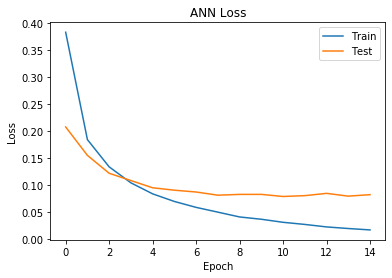

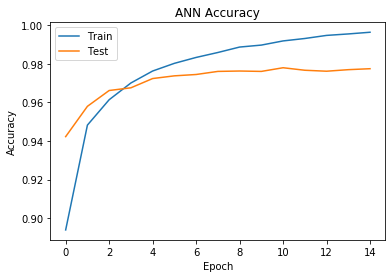

In [11]:
if __name__ == '__main__':
    main()